# Kapitel 0: Einleitung und Überblick

# Kapitel 1: Riemann-Integrale mit Ober- und Untersummen, Trapezregel

# Kapitel 2: Monte-Carlo-Integration

# Kapitel 3: Visualisierung der Ergebnisse

# Kapitel 4: Testfälle und Evaluation

Beispiel für sin(x) bei n = 25:
----------------------------------------
Exakter Wert (Fläche)     : 4.000000
Obersumme                 : 3.994430
Untersumme                : 3.995050
Trapezregel               : 3.994740
Monte-Carlo               : 3.971457
----------------------------------------


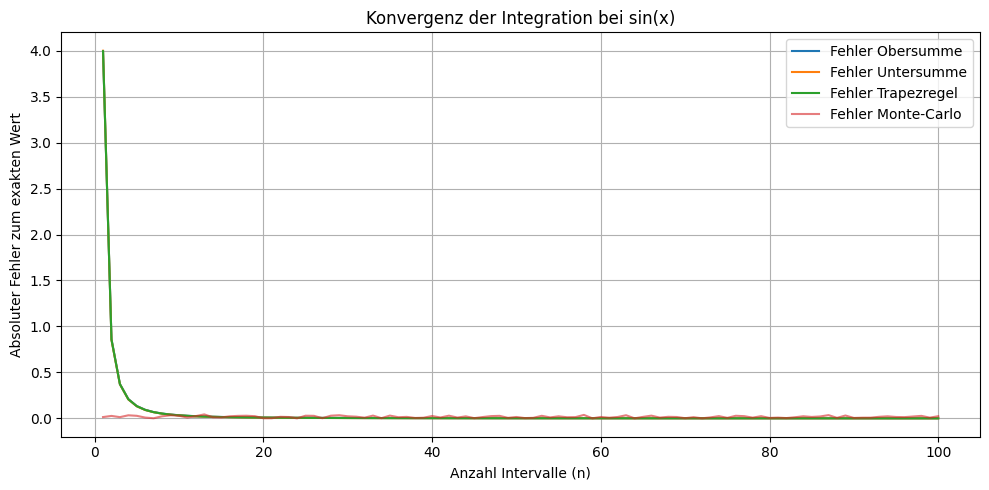

Beispiel für x^2 - 4x + 2 bei n = 25:
----------------------------------------
Exakter Wert (Fläche)     : 37.104547
Obersumme                 : 38.620269
Untersumme                : 35.605994
Trapezregel               : 37.113132
Monte-Carlo               : 37.070305
----------------------------------------


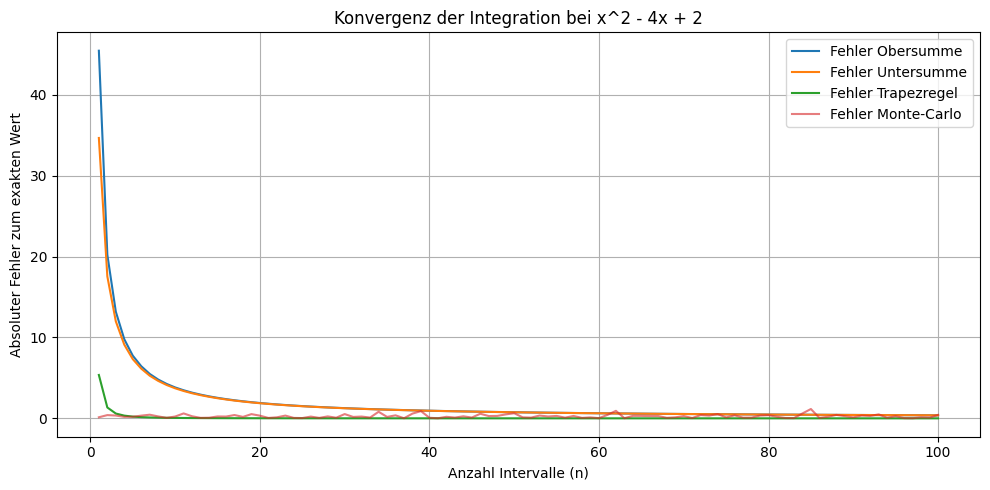

Beispiel für exp(x) bei n = 25:
----------------------------------------
Exakter Wert (Fläche)     : 22025.465795
Obersumme                 : 26723.451675
Untersumme                : 17913.265357
Trapezregel               : 22318.358516
Monte-Carlo               : 22324.723026
----------------------------------------


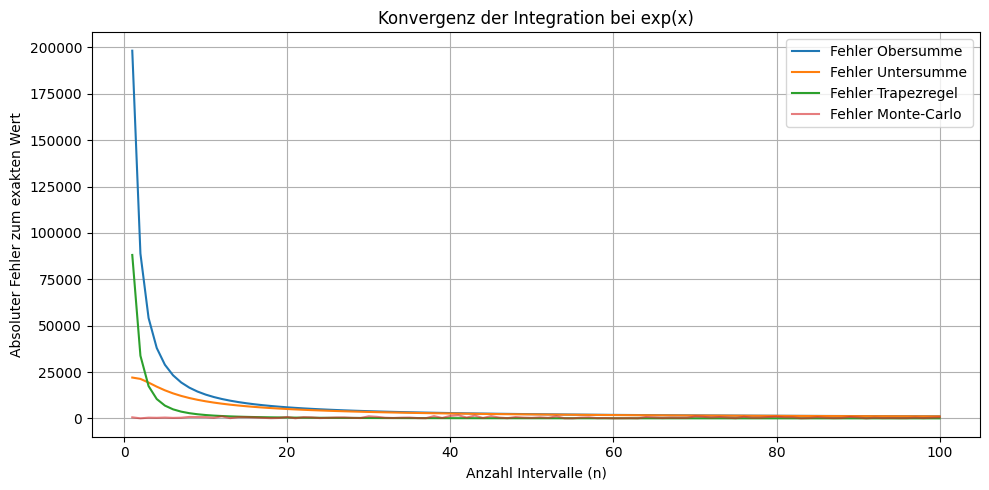

Beispiel für sqrt(x) bei n = 25:
----------------------------------------
Exakter Wert (Fläche)     : 5.333333
Obersumme                 : 5.479965
Untersumme                : 5.167277
Trapezregel               : 5.323621
Monte-Carlo               : 5.340236
----------------------------------------


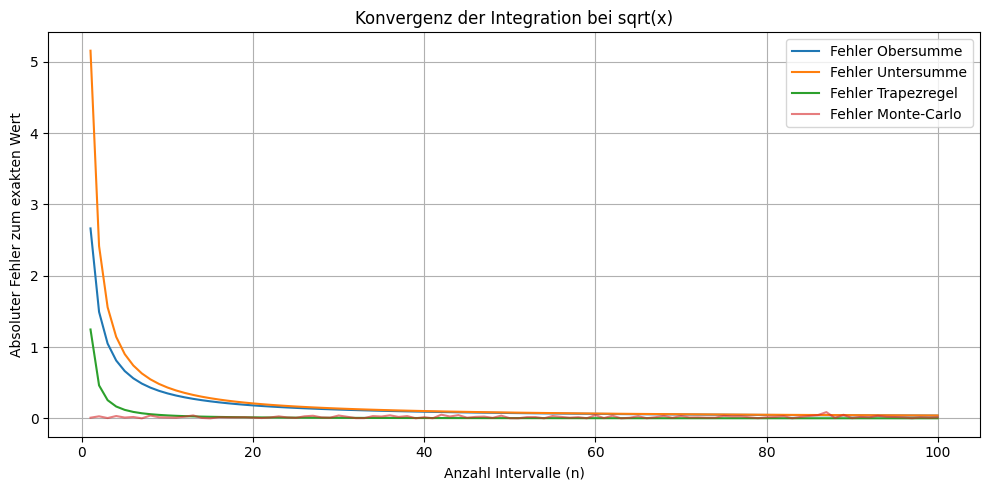

Beispiel für sin(16π(x+1)) bei n = 25:
----------------------------------------
Exakter Wert (Fläche)     : 0.636565
Obersumme                 : 0.635678
Untersumme                : 0.635777
Trapezregel               : 0.635728
Monte-Carlo               : 0.637782
----------------------------------------


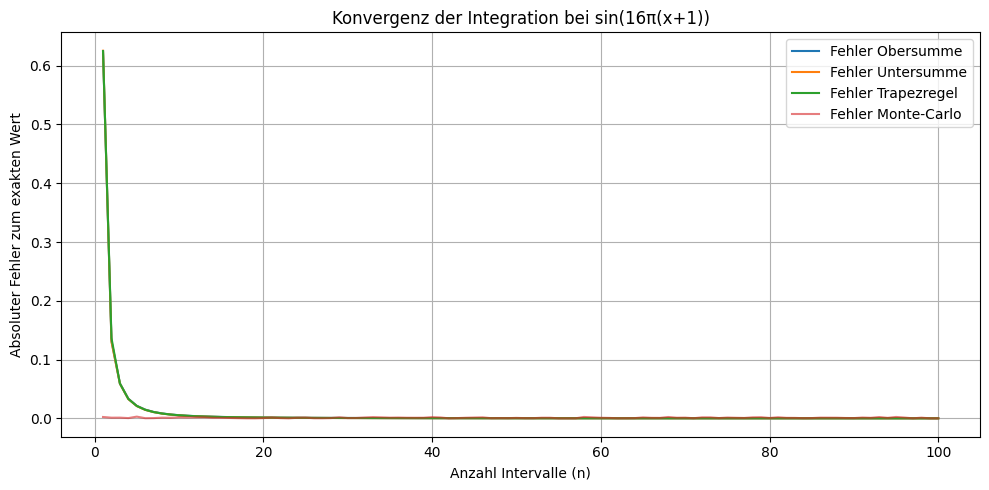

Beispiel für 1/sqrt(x) bei n = 25:
----------------------------------------
Exakter Wert (Fläche)     : 1.993675
Obersumme                 : 14.336783
Untersumme                : 1.727798
Trapezregel               : 8.032291
Monte-Carlo               : 1.940621
----------------------------------------


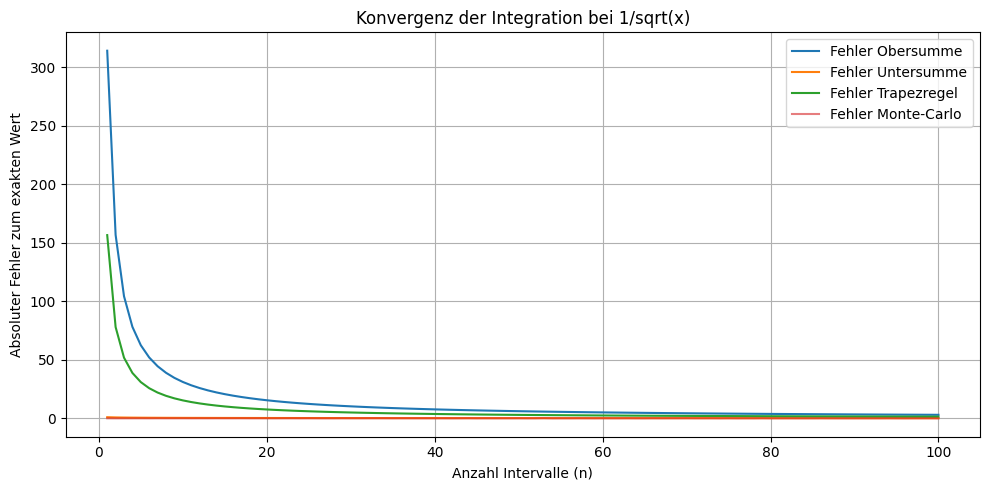

Beispiel für Stufenfunktion bei n = 25:
----------------------------------------
Exakter Wert (Fläche)     : 1.000000
Obersumme                 : 1.000000
Untersumme                : 1.000000
Trapezregel               : 1.020000
Monte-Carlo               : 1.000000
----------------------------------------


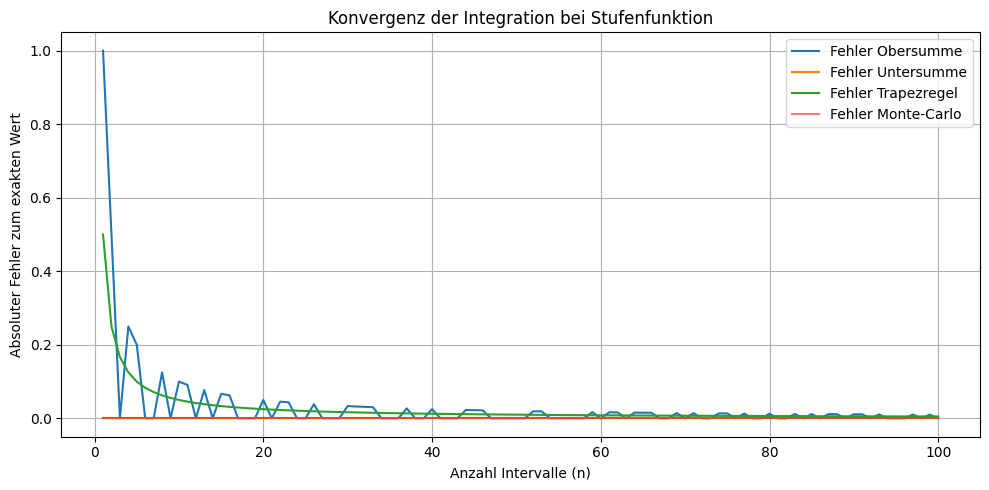

Beispiel für |x| bei n = 25:
----------------------------------------
Exakter Wert (Fläche)     : 9.000000
Obersumme                 : 9.705600
Untersumme                : 8.323200
Trapezregel               : 9.014400
Monte-Carlo               : 9.003678
----------------------------------------


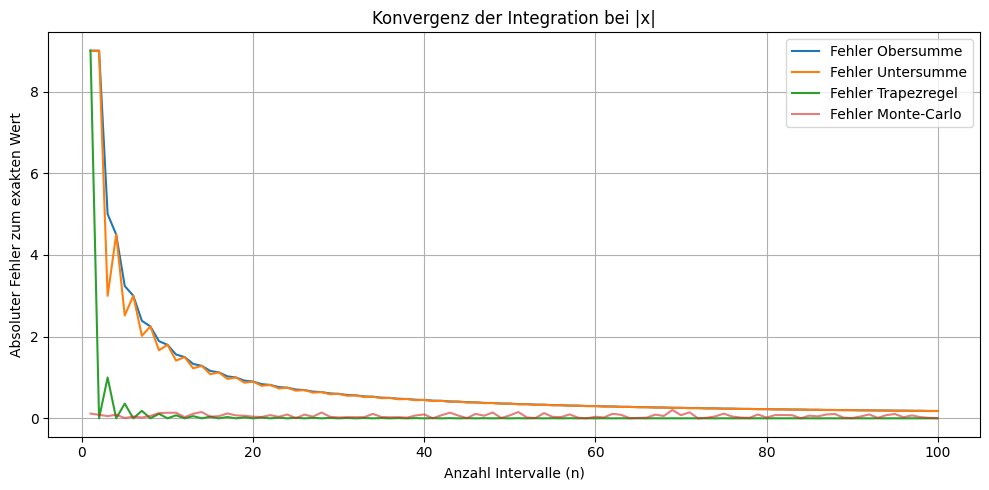

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# Integration Methods
# ------------------------------

def upper_sum(f, a, b, n):
    dx = (b - a) / n
    xs = np.linspace(a, b, n, endpoint=False)
    return sum(np.max(f(np.array([x, x + dx]))) * dx for x in xs)

def lower_sum(f, a, b, n):
    dx = (b - a) / n
    xs = np.linspace(a, b, n, endpoint=False)
    return sum(np.min(f(np.array([x, x + dx]))) * dx for x in xs)

def trapezoid_rule(f, a, b, n):
    xs = np.linspace(a, b, n+1)
    dx = (b - a) / n
    return (dx / 2) * np.sum(f(xs[:-1]) + f(xs[1:]))

def monte_carlo(f, a, b, samples=5000):
    xs = np.random.uniform(a, b, samples)
    return (b - a) * np.mean(f(xs))

def exact_integral(F, a, b, f=None):
    if f is None:
        return F(b) - F(a)
    else:
        parts = get_zeros_in_interval(f, a, b)
        return sum(abs(F(parts[i+1]) - F(parts[i])) for i in range(len(parts)-1))

# ------------------------------
# Nullstellen erkennen und Intervall aufteilen
# ------------------------------

def get_zeros_in_interval(f, a, b, steps=1000):
    xs = np.linspace(a, b, steps)
    zeros = []
    for i in range(len(xs) - 1):
        if np.sign(f(xs[i])) != np.sign(f(xs[i+1])):
            zeros.append((xs[i] + xs[i+1]) / 2)
    return [a] + zeros + [b]

def piecewise_integration(method, f, a, b, n):
    parts = get_zeros_in_interval(f, a, b)
    total = 0.0
    for i in range(len(parts) - 1):
        sub_a = parts[i]
        sub_b = parts[i + 1]
        part = method(f, sub_a, sub_b, n)
        total += abs(part)
    return total

# ------------------------------
# Funktionen und Stammfunktionen
# ------------------------------

functions = {
    # Klassische Beispiele
    "sin(x)": {
        "f": np.sin,
        "F": lambda x: -np.cos(x),
        "a": 0,
        "b": 2 * np.pi
    },
    "x^2 - 4x + 2": {
        "f": lambda x: x**2 - 4*x + 2,
        "F": lambda x: (1/3)*x**3 - 2*x**2 + 2*x,
        "a": -3,
        "b": 3
    },
    "exp(x)": {
        "f": np.exp,
        "F": lambda x: np.exp(x),
        "a": 0,
        "b": 10
    },

    # Wurzel mit Nullstelle
    "sqrt(x)": {
        "f": np.sqrt,
        "F": lambda x: (2/3) * x**1.5,
        "a": 0,
        "b": 4
    },

    # Oszillierende Funktion
    "sin(16π(x+1))": {
        "f": lambda x: np.sin(16 * np.pi * (x + 1)),
        "F": lambda x: -1 / (16 * np.pi) * np.cos(16 * np.pi * (x + 1)),
        "a": 0,
        "b": 1
    },

    # Funktion mit Polstelle (x -> 0⁺)
    "1/sqrt(x)": {
        "f": lambda x: 1 / np.sqrt(x),
        "F": lambda x: 2 * np.sqrt(x),
        "a": 1e-5,
        "b": 1
    },

    # # Gaußfunktion: nicht analytisch integrierbar
    # "e^(-x^2)": {
    #     "f": lambda x: np.exp(-x**2),
    #     "F": lambda x: 0.5 * np.sqrt(np.pi) * erf(x),  # benötigt scipy.special.erf
    #     "a": -2,
    #     "b": 2
    # },

    # Sprungfunktion / Heaviside-artig
    "Stufenfunktion": {
        "f": lambda x: np.where(x < 0, 0, 1),
        "F": lambda x: np.where(x < 0, 0, x),
        "a": -1,
        "b": 1
    },

    # Betragsfunktion
    "|x|": {
        "f": lambda x: np.abs(x),
        "F": lambda x: 0.5 * x * np.abs(x),
        "a": -3,
        "b": 3
    }
}

# ------------------------------
# Analyse aller Funktionen mit Konvergenzplot
# ------------------------------

def analyze_all_functions():
    for name, f_obj in functions.items():
        f = f_obj["f"]
        F = f_obj["F"]
        a = f_obj["a"]
        b = f_obj["b"]

        exact = exact_integral(F, a, b, f)
        n_values = np.arange(1, 101)
        results_upper = []
        results_lower = []
        results_trapezoid = []
        results_monte = []

        for n in n_values:
            results_upper.append(piecewise_integration(upper_sum, f, a, b, n))
            results_lower.append(piecewise_integration(lower_sum, f, a, b, n))
            results_trapezoid.append(piecewise_integration(trapezoid_rule, f, a, b, n))
            results_monte.append(piecewise_integration(lambda f, a, b, _: monte_carlo(f, a, b), f, a, b, n))

        # Einzelnes Beispiel bei n = 25
        idx_25 = 24
        print(f"Beispiel für {name} bei n = 25:")
        print("-" * 40)
        print(f"Exakter Wert (Fläche)     : {exact:.6f}")
        print(f"Obersumme                 : {results_upper[idx_25]:.6f}")
        print(f"Untersumme                : {results_lower[idx_25]:.6f}")
        print(f"Trapezregel               : {results_trapezoid[idx_25]:.6f}")
        print(f"Monte-Carlo               : {results_monte[idx_25]:.6f}")
        print("-" * 40)

        # Plot Fehlerentwicklung
        plt.figure(figsize=(10, 5))
        plt.plot(n_values, np.abs(np.array(results_upper) - exact), label="Fehler Obersumme")
        plt.plot(n_values, np.abs(np.array(results_lower) - exact), label="Fehler Untersumme")
        plt.plot(n_values, np.abs(np.array(results_trapezoid) - exact), label="Fehler Trapezregel")
        plt.plot(n_values, np.abs(np.array(results_monte) - exact), label="Fehler Monte-Carlo", alpha=0.6)
        plt.title(f"Konvergenz der Integration bei {name}")
        plt.xlabel("Anzahl Intervalle (n)")
        plt.ylabel("Absoluter Fehler zum exakten Wert")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# ------------------------------
# Aufruf starten
# ------------------------------

if __name__ == "__main__":
    analyze_all_functions()

# Kapitel 5: Grenzen numerischer Integration

# Kapitel 6: Fakultativ: Gaußsche Fehlerfunktion

# Kapitel 7: Zusammenfassung und Fazit

## Anhang: Quellen, Anmerkungen, Gruppenmitglieder